# Minor Project 
#### - Vadali V L S Shravya

## Face Mask detector for Covid-19 

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
import tensorflow as tf
import tensorflow.keras as keras

C:\Users\pravallika\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pravallika\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pravallika\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pravallika\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: 

In [3]:
#getting the path of the data
data_path = r'\Users\pravallika\Desktop\SHRAVYA\Untitled Folder\dataset'
categories = os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

label_dict

{'without_mask': 0, 'with_mask': 1}

In [4]:
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names= os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(100,100))
            data.append(resized)
            target.append(label_dict[category])
        
        except Exception as e:
            print('Exception:',e)

In [5]:
#converting images into numpy array
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],100,100,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [6]:
np.save('data',data)
np.save('target',new_target)

In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [8]:
#model building
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=data.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
#printing the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [23]:
#model checkpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
  'model-{epoch:03d}.model',
  monitor='val_loss',
  verbose=0,
  save_best_only=True,
  mode='auto')

history=model.fit(
  train_data,
  train_target,
  epochs=25,
  callbacks=[checkpoint],
  validation_split=0.2)


Train on 990 samples, validate on 248 samples
Epoch 1/25
990/990 [==============================] - 8s 8ms/sample - loss: 0.0966 - acc: 0.9697 - val_loss: 0.1222 - val_acc: 0.9597
Epoch 2/25
990/990 [==============================] - 8s 8ms/sample - loss: 0.1093 - acc: 0.9626 - val_loss: 0.1168 - val_acc: 0.9597
Epoch 3/25
990/990 [==============================] - 8s 9ms/sample - loss: 0.0989 - acc: 0.9646 - val_loss: 0.1074 - val_acc: 0.9677
Epoch 4/25
990/990 [==============================] - 9s 9ms/sample - loss: 0.0854 - acc: 0.9717 - val_loss: 0.0994 - val_acc: 0.9637
Epoch 5/25
990/990 [==============================] - 9s 9ms/sample - loss: 0.0794 - acc: 0.9667 - val_loss: 0.0829 - val_acc: 0.9758
Epoch 6/25
990/990 [==============================] - 8s 8ms/sample - loss: 0.0766 - acc: 0.9717 - val_loss: 0.1069 - val_acc: 0.9637
Epoch 7/25
990/990 [==============================] - 8s 8ms/sample - loss: 0.0641 - acc: 0.9808 - val_loss: 0.0870 - val_acc: 0.9677
Epoch 8/25
990/9

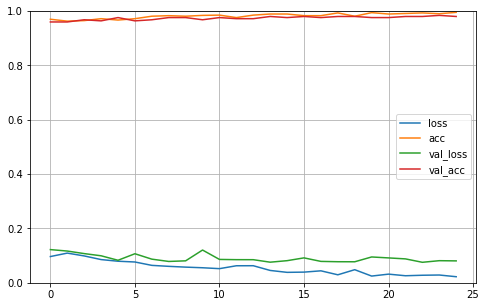

<Figure size 576x432 with 0 Axes>

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

figure = plt.gcf() 
figure.set_size_inches(8, 6) 
#plt.savefig('filename.png', bbox_inches='tight')
plt.savefig('loss_accuracy_graph.png',dpi=300, bbox_inches='tight')

In [25]:
model.save("model_v2.h5")

In [26]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 0s 3ms/sample - loss: 0.0350 - acc: 0.9928
[0.03496512369779141, 0.9927536]


## Accuracy on test data : 99.28%

In [27]:
new=test_data[:5]

In [28]:
y_pred = model.predict_classes(new)
#printing the predictions
print(y_pred)
print(label_dict) 
# 0: without mask && 1: with mask

[[1]
 [1]
 [1]
 [1]
 [0]]
{'without_mask': 0, 'with_mask': 1}


### displaying the five images to check the output predictions

AxesImage(54,36;334.8x217.44)


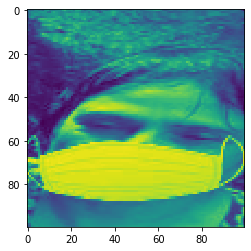

In [29]:
print(plt.imshow(test_data[0].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


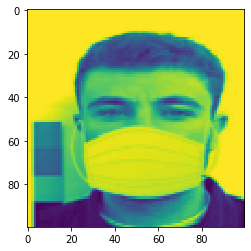

In [30]:
print(plt.imshow(test_data[1].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


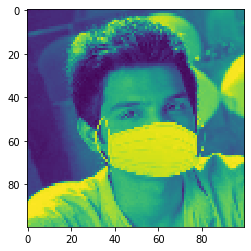

In [31]:
print(plt.imshow(test_data[2].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


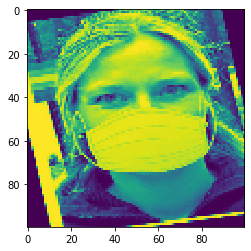

In [32]:
print(plt.imshow(test_data[3].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


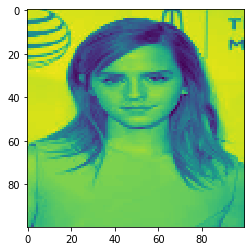

In [33]:
print(plt.imshow(test_data[4].reshape(100,100)))